In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
USAmonthyearAc2name = pd.read_csv('queries_results/USA/USA monthyear ac2name count.csv', header = 0,sep=' *, *')
USAmonthyearAc2name["Time"]=pd.to_datetime(USAmonthyearAc2name['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


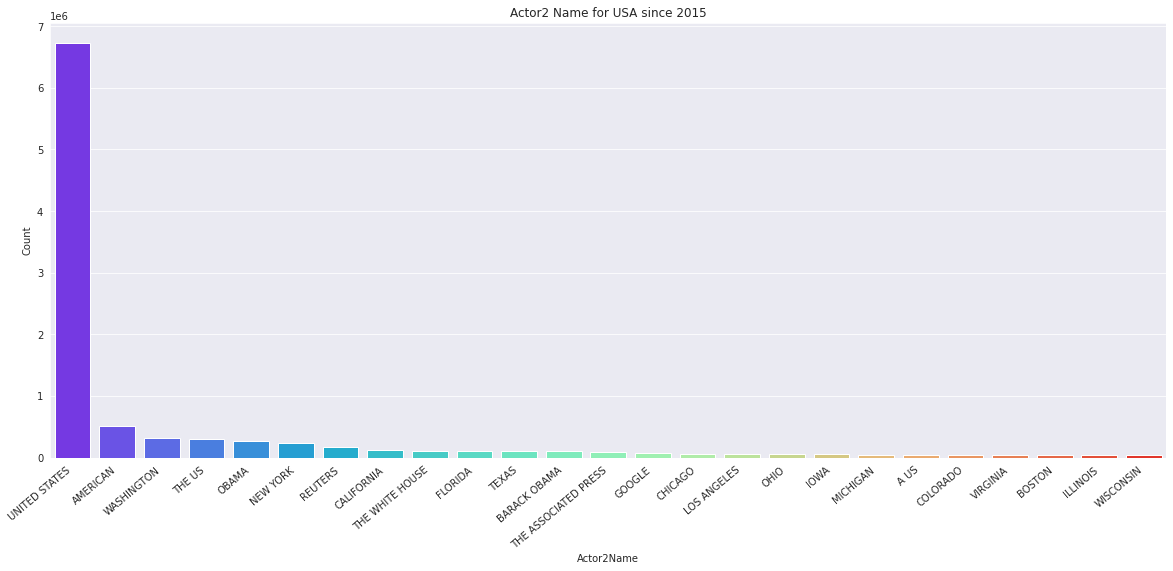

In [3]:
s = USAmonthyearAc2name.groupby("Actor2Name").sum().sort_values(by="Count", ascending=False).head(25)
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor2 Name for USA since 2015")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)

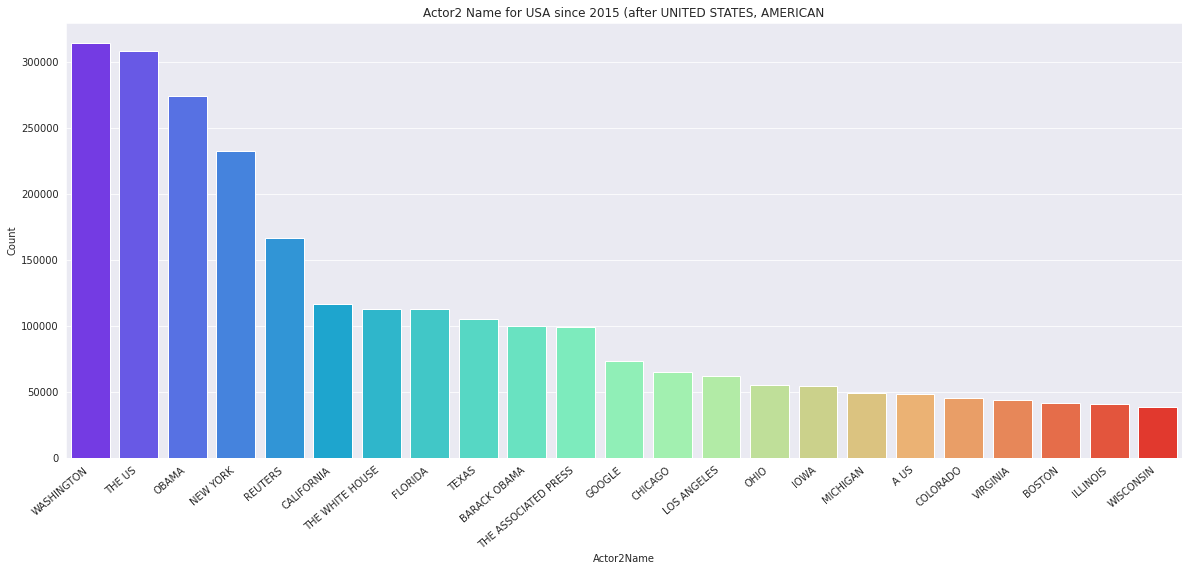

In [7]:
s = USAmonthyearAc2name.groupby("Actor2Name").sum().sort_values(by="Count", ascending=False).head(25)[2:]
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor2 Name for USA since 2015 (after UNITED STATES, AMERICAN")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)

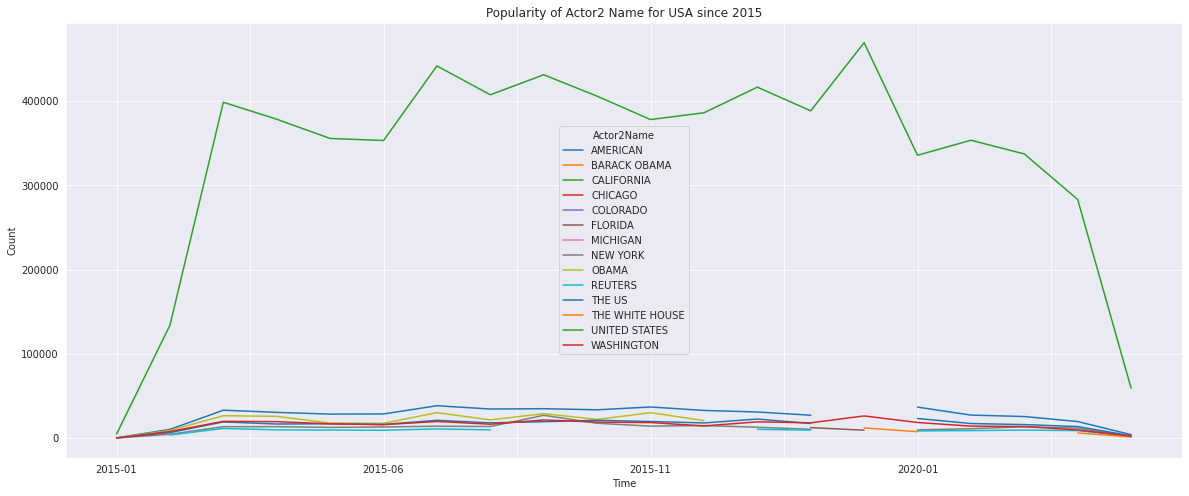

In [12]:
s = USAmonthyearAc2name.groupby(["Actor2Name", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(7)
s = s.groupby(["Time","Actor2Name"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Popularity of Actor2 Name for USA since 2015")
g.figure.set_size_inches(20,8)

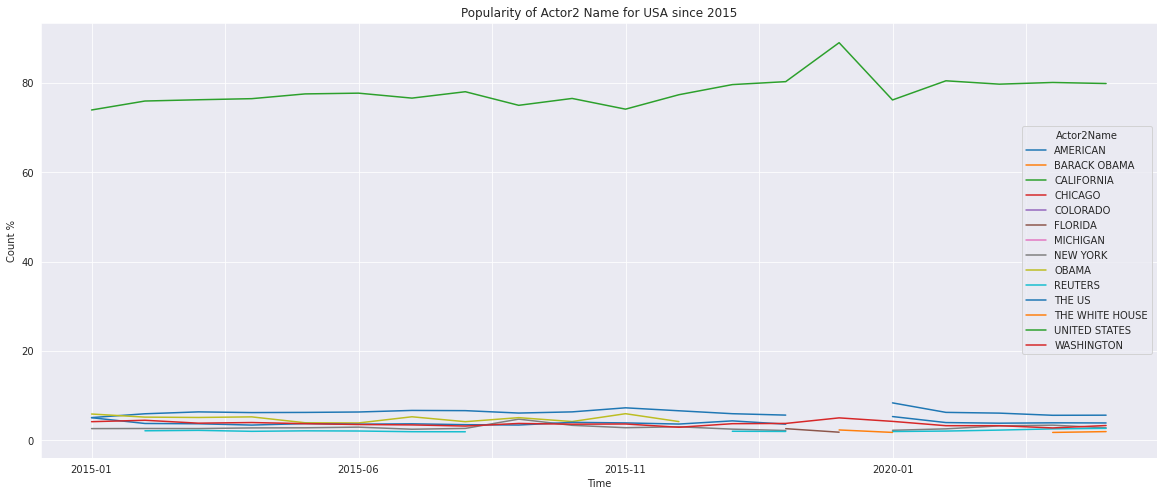

In [6]:
s = USAmonthyearAc2name.groupby(["Actor2Name", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(7)
s = s.groupby(["Time","Actor2Name"]).agg({'Count':'sum'})
s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())
g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Popularity of Actor2 Name for USA since 2015")
g.figure.set_size_inches(20,8)